# Observed Trends:
- Not surprisingly, we can see the negative correlation between absolute value of latitude and temperature. However, a majority of the data points are pulled from cities north of the equator
- At the observed time, latitudes between 0-20 and 40-60 were seeing high humidity percentages while the gap between 40-60 was much lower
- Cloudiness and wind speed didn't seem to have any correlation with latitude based on the observed conditions

In [163]:
import csv
import requests
import json
from citipy import citipy
from config import api_key
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [164]:
# time.strftime('%B %d, %Y')

In [165]:
# Pull 500 random samples from citipy worldcities.csv (Over 45k cities in csv)
cities_df = pd.read_csv("https://raw.githubusercontent.com/wingchen/citipy/master/citipy/worldcities.csv").sample(n=500)
cities_df.head()

,Country,City,Latitude,Longitude
12007,fr,saint-etienne,45.435382,4.391051
44278,us,columbia,38.951667,-92.333889
14150,gr,plomarion,38.976667,26.368056
15593,hu,gyor,47.687281,17.637616
27913,ph,claveria,12.903500,123.245700


In [166]:
# Assign base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create counter
counter = 1

# Create new columns to store new API data
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""


# Loop through cities rows
for index, row in cities_df.iterrows():
    
    # Create lat and lon vars
    lat = round(row['Latitude'], 2)
    lon = round(row['Longitude'], 2)

    # Create params and generate API resonse
    params = {"appid": api_key, "lat": lat, "lon": lon, "units": "imperial"}
    response = requests.get(url, params=params)
    response_json = response.json()
    
    # Store relevant vars
    city_name = response_json['name']
    temp = response_json['main']['temp']
    humidity = response_json['main']['humidity']
    cloudiness = response_json['clouds']['all']
    wind_speed = response_json['wind']['speed']
    
#     # Write vars to DF
    cities_df.set_value(index, "Temperature (F)", temp)
    cities_df.set_value(index, "Humidity (%)", humidity)
    cities_df.set_value(index, "Cloudiness (%)", cloudiness)
    cities_df.set_value(index, "Wind Speed (mph)", wind_speed)
    
    # Print log
    print(f"Requesting City #{counter}: {city_name}, URL: {response.url}")
    print("---------------------------------------------------------------")
    
    # Add to Counter
    counter = counter + 1

cities_df.head()

Requesting City #1: Saint-Etienne, URL: http://api.openweathermap.org/data/2.5/weather?appid=ccafc75a70c2015a73008b45469e478c&lat=45.44&lon=4.39&units=imperial
---------------------------------------------------------------
Requesting City #2: Columbia, URL: http://api.openweathermap.org/data/2.5/weather?appid=ccafc75a70c2015a73008b45469e478c&lat=38.95&lon=-92.33&units=imperial
---------------------------------------------------------------
Requesting City #3: Plomarion, URL: http://api.openweathermap.org/data/2.5/weather?appid=ccafc75a70c2015a73008b45469e478c&lat=38.98&lon=26.37&units=imperial
---------------------------------------------------------------
Requesting City #4: Gyor, URL: http://api.openweathermap.org/data/2.5/weather?appid=ccafc75a70c2015a73008b45469e478c&lat=47.69&lon=17.64&units=imperial
---------------------------------------------------------------
Requesting City #5: Claveria, URL: http://api.openweathermap.org/data/2.5/weather?appid=ccafc75a70c2015a73008b45469e47

,Country,City,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
12007,fr,saint-etienne,45.435382,4.391051,45.84,56,0,8.05
44278,us,columbia,38.951667,-92.333889,34.92,51,1,10.29
14150,gr,plomarion,38.976667,26.368056,60.8,82,40,16.11
15593,hu,gyor,47.687281,17.637616,43.99,100,0,6.93
27913,ph,claveria,12.903500,123.245700,82.95,96,36,13


In [167]:
#Export to csv
cities_df.to_csv('city_weather_data.csv')

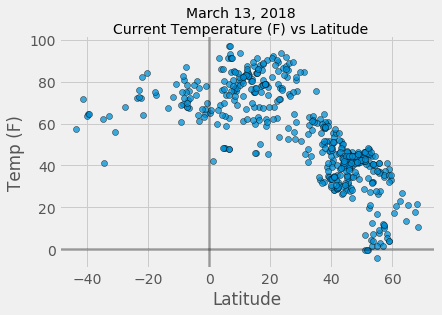

In [174]:
# Create temp vs lat scatter
plt.style.use('fivethirtyeight')
plt.scatter(cities_df['Latitude'], cities_df['Temperature (F)'], edgecolors='black', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Temp (F)')
date = time.strftime('%B %d, %Y')
plt.suptitle(f'{date}\nCurrent Temperature (F) vs Latitude', fontsize=14)
plt.axhline(alpha=0.25, lw=3)
plt.axvline(alpha=0.25, lw=3)
plt.savefig('temp.png')
plt.show()

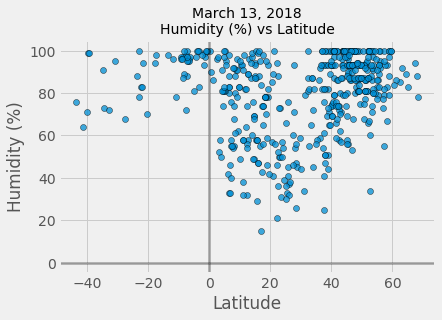

In [175]:
# Create humidity vs lat scatter
plt.style.use('fivethirtyeight')
plt.scatter(cities_df['Latitude'], cities_df['Humidity (%)'],edgecolors='black', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'{date}\nHumidity (%) vs Latitude', fontsize=14)
plt.axhline(alpha=0.25, lw=3)
plt.axvline(alpha=0.25, lw=3)
plt.savefig('humidity.png')
plt.show()

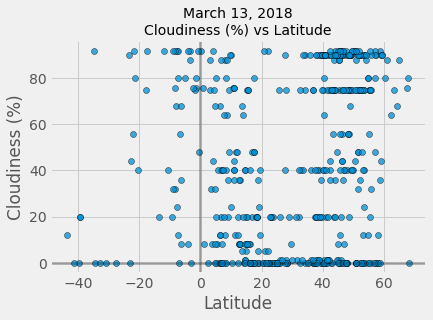

In [173]:
# Create cloudiness vs lat scatter
plt.style.use('fivethirtyeight')
plt.scatter(cities_df['Latitude'], cities_df['Cloudiness (%)'], edgecolors='black', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'{date}\nCloudiness (%) vs Latitude', fontsize=14)
plt.axhline(alpha=0.25, lw=3)
plt.axvline(alpha=0.25, lw=3)
plt.savefig('cloudiness.png')
plt.show()

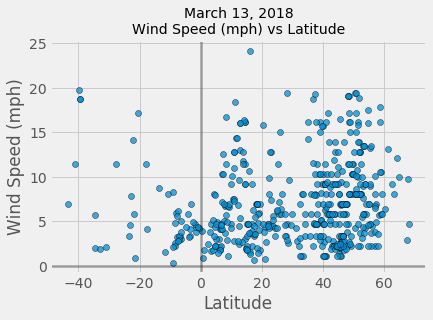

In [176]:
# Create wind speed vs lat scatter
plt.style.use('fivethirtyeight')
plt.scatter(cities_df['Latitude'], cities_df['Wind Speed (mph)'], edgecolors='black', alpha=0.75)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'{date}\nWind Speed (mph) vs Latitude', fontsize=14)
plt.axhline(alpha=0.25, lw=3)
plt.axvline(alpha=0.25, lw=3)
plt.savefig('wind_speed.png')
plt.show()